In [12]:
from jax import grad, vmap, jit, tree_map, value_and_grad
from jax.numpy.linalg import norm
from jax import make_jaxpr
import jax.numpy as jnp
import matplotlib.pyplot as plt
from tqdm import tqdm
%config InlineBackend.figure_formats = ['svg']

17.744686


100%|██████████| 10000/10000 [00:00<00:00, 12804.01it/s]


(-10.0, 10.0)

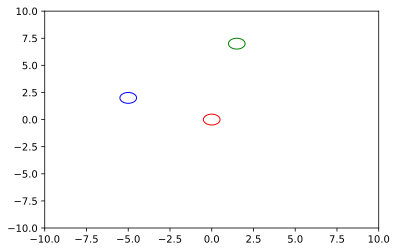

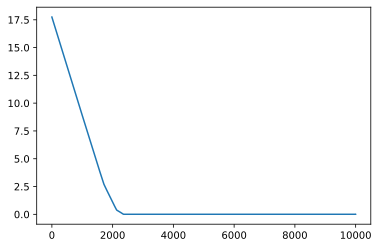

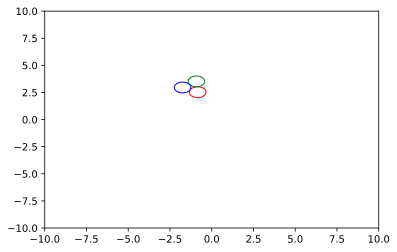

In [22]:
d_target = 1.0


def loss(params):

    d1 = norm(norm((params["p0"] - params["p1"])) - d_target)
    d2 = norm(norm((params["p0"] - params["p2"])) - d_target)
    d3 = norm(norm((params["p1"] - params["p2"])) - d_target)
    return d1 + d2 + d3


def update(params):

    l, gradients = value_and_grad(loss)(params)
    lr = 0.001
    params = tree_map(lambda p, g: p - lr * g, params, gradients)
    return l, params


params = {
    "p0": jnp.array((0.0, 0.0)),
    "p1": jnp.array((1.5, 7.0)),
    "p2": jnp.array((-5, 2.0)),
}

update_jit = jit(update)
losses = []

fig, ax = plt.subplots()
c1 = plt.Circle(params["p0"], d_target/2, color='r', fill=False)
c2 = plt.Circle(params["p1"], d_target/2, color='g',fill=False)
c3 = plt.Circle(params["p2"], d_target/2, color='b',fill=False)
ax.add_patch(c1)
ax.add_patch(c2)
ax.add_patch(c3)
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))

print(loss(params))


for _ in tqdm(range(10000)):
    value, params = update_jit(params)
    losses.append(value)


fig, ax = plt.subplots()
ax.plot(losses)


fig, ax = plt.subplots()
c1 = plt.Circle(params["p0"], d_target/2, color='r', fill=False)
c2 = plt.Circle(params["p1"], d_target/2, color='g',fill=False)
c3 = plt.Circle(params["p2"], d_target/2, color='b',fill=False)
ax.add_patch(c1)
ax.add_patch(c2)
ax.add_patch(c3)
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))

In [33]:
params

{'p0': DeviceArray([ 1.5689406e-05, -3.3342129e-01], dtype=float32),
 'p1': DeviceArray([-8.4770443e-05, -3.3330035e-01], dtype=float32),
 'p2': DeviceArray([ 7.0208982e-05, -3.3327383e-01], dtype=float32)}